In [105]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [106]:
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2016, 12, 31)

#list of stocks in portfolio
tickers = ['AAPL','BABA', 'FB', 'NKE']
#Array of weights in portfolio
weight = np.array(([0.25], [0.25], [0.25], [0.25]))

In [107]:
data = web.DataReader(tickers, 'yahoo', start, end)['Adj Close']
data = data.sort_index()
data = np.round(data, decimals=2)
daily_prices = data

daily_returns = daily_prices.pct_change()
daily_returns.dropna(inplace=True)
daily_returns.head()

,AAPL,BABA,FB,NKE
Date,,,,
2016-01-05,-0.025052,0.025297,0.004989,0.013907
2016-01-06,-0.019549,-0.016533,0.002336,-0.014206
2016-01-07,-0.042240,-0.059615,-0.049043,-0.026669
2016-01-08,0.005258,-0.026403,-0.006025,-0.016338
2016-01-11,0.016225,-0.012429,0.001849,0.011592


In [108]:
daily_returns['Portfolio'] = daily_returns.dot(weight)
daily_returns.head()

,AAPL,BABA,FB,NKE,Portfolio
Date,,,,,
2016-01-05,-0.025052,0.025297,0.004989,0.013907,0.004785
2016-01-06,-0.019549,-0.016533,0.002336,-0.014206,-0.011988
2016-01-07,-0.042240,-0.059615,-0.049043,-0.026669,-0.044392
2016-01-08,0.005258,-0.026403,-0.006025,-0.016338,-0.010877
2016-01-11,0.016225,-0.012429,0.001849,0.011592,0.004309


In [109]:
cum_daily_returns = (1 + daily_returns).cumprod()
cum_daily_returns.tail()

,AAPL,BABA,FB,NKE,Portfolio
Date,,,,,
2016-12-23,1.130661,1.131699,1.147231,0.853808,1.076751
2016-12-27,1.137833,1.141479,1.154471,0.843709,1.079299
2016-12-28,1.133019,1.139262,1.143807,0.839238,1.073711
2016-12-29,1.132724,1.138740,1.138231,0.839901,1.072422
2016-12-30,1.123883,1.144999,1.125514,0.836093,1.067592


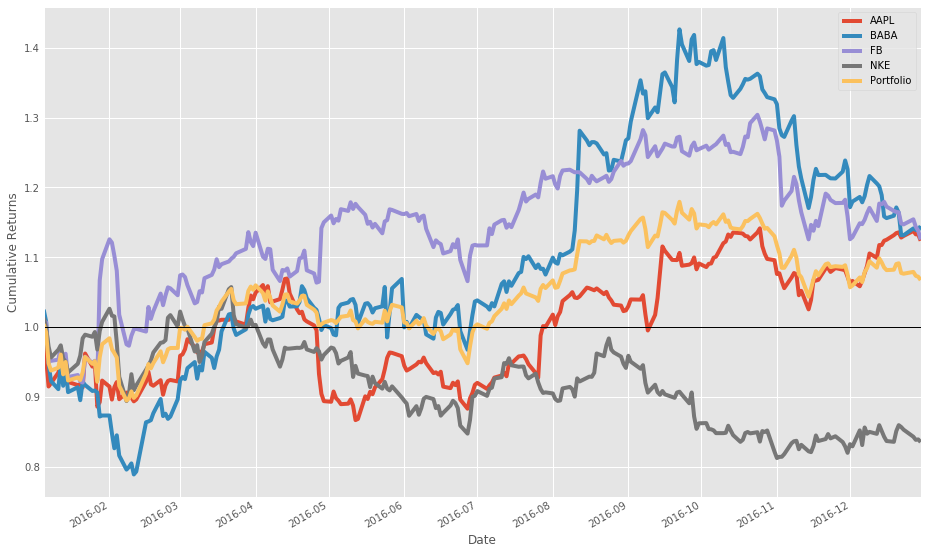

In [110]:
cum_daily_returns.plot(grid = True, figsize=(14,10)).axhline(y = 1, color = "black", lw = 1)
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

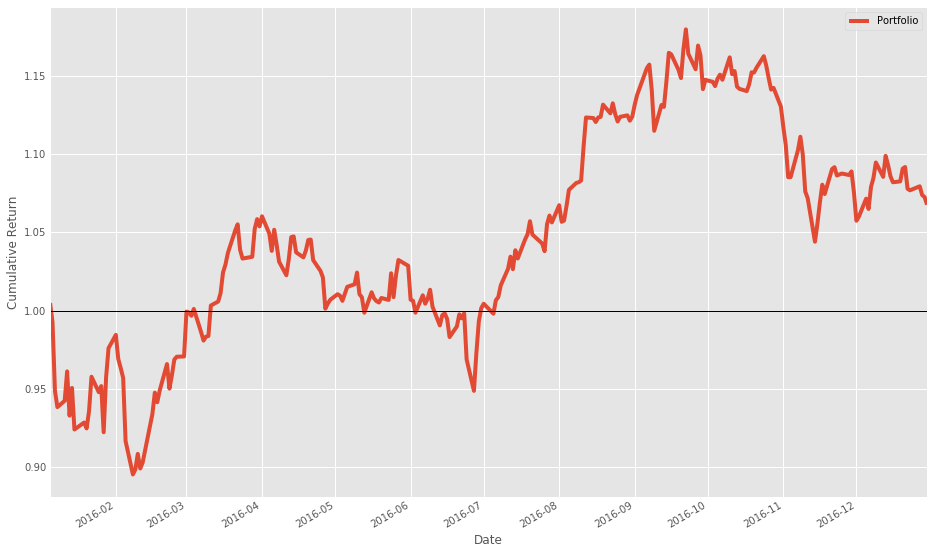

In [111]:
# Construct a portfolio with beta hedging
cum_daily_returns['Portfolio'].plot(grid = True, figsize=(14,10)).axhline(y = 1, color = "black", lw = 1)
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()